# **CEFET/RJ Nova Friburgo**
## **Gestão do Conhecimento e da Informação**
### Gustavo Xavier Saldanha e Thiago Rocha Duarte
#### Dataset - Most Streamed Spotify Songs 2023

Importando as bibliotecas necessárias:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats

Importando o banco de dados.
<br />
Ao rodar, irá abrir um botão de upload.
<br />
Clique nele e selecione o arquivo do banco de dados. O arquivo será carregado no ambiente local.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify-2023.csv to spotify-2023 (1).csv


Coloca o banco de dados na variável 'df'

In [ ]:
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

Mostra algumas informações do banco de dados, como colunas e tipo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Remove as linhas do DataFrame df em que o valor na coluna 'key' é nulo (NaN).

In [ ]:
df = df.dropna(subset=['key'])

Remove todas as linhas do DataFrame df que contêm pelo menos um valor nulo (NaN).

In [ ]:
df.dropna(inplace=True)

Muda o tipo da coluna 'streams' para tipo numérico.

In [ ]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

Cria uma coluna chamada 'track_id' com valores únicos para cada track_name da tabela.

In [ ]:
track_name_to_id = {name: idx for idx, name in enumerate(df['track_name'].unique())}
df['track_id'] = df['track_name'].map(track_name_to_id)

Cria uma nova variável 'df_voi'. Esta variável é a nova tabela. Ela contém apenas as colunas mencionadas em 'voi_col'.

In [ ]:
voi_col = ['track_id', 'track_name', 'streams','bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df_voi = df[voi_col]

Cria uma variável chamada 'df_da' que recebe a 'df_voi'.

In [ ]:
df_da = df_voi

Geramos um conjunto de histogramas para visualizar a distribuição de várias características musicais no DataFrame df_da. As barras vermelhas nos gráficos mostram a frequência dos valores em intervalos específicos, proporcionando uma visão rápida das distribuições dessas características musicais.

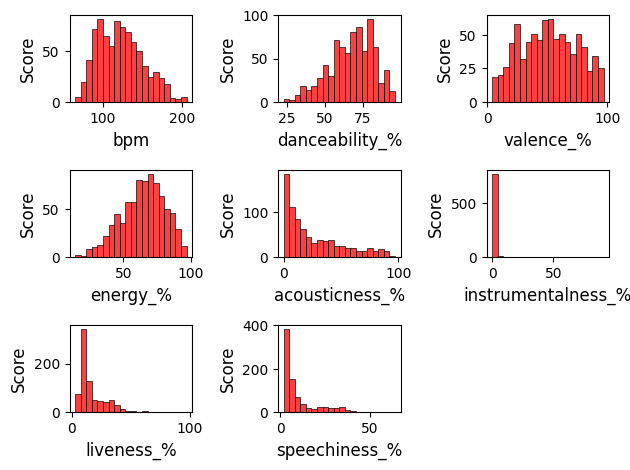

In [ ]:
columns_to_plot = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_da, x=column, bins=20, color='red')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()

####Plotando e aplicando o teste de Pearson

De início nós aplicamos o teste de Pearson para visualizar a correlação entre dois atributos (va1 e var2). Vamos usar de exemplo var1 como BPM (batidas por minuto) e var2 como danceability ("dançabilidade"). O gráfico mostra como a variação no BPM se relaciona com a variação na danceability das músicas. A linha de regressão no gráfico fornece uma indicação visual da direção e força dessa correlação. Esse é um exemplo da aplicação do teste de Pearson e mais a frente desenvolveremos mais esse teste e aplicaremos em diferentes casos.

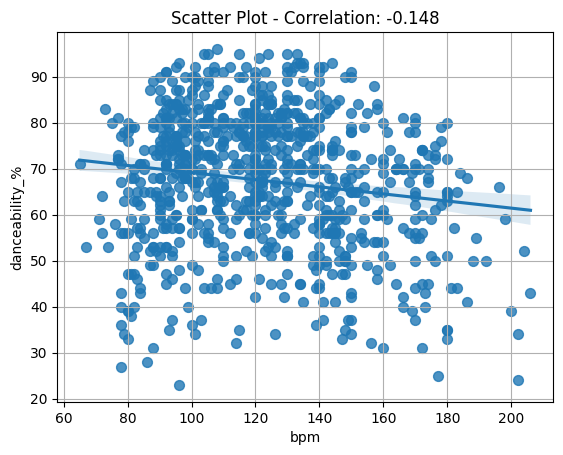

In [ ]:
var1 = 'bpm'
var2 = 'danceability_%'

correlation = df[var1].corr(df[var2], method='pearson')

sns.regplot(x=var1, y=var2, data=df, scatter_kws={'s': 50})
plt.title(f'Scatter Plot - Correlation: {correlation:.3f}')
plt.grid(True)
plt.show()

####Analisando Correlações Musicais

Este código cria um mapa de calor (heatmap) para visualizar a matriz de correlação entre os atributos musicais(BPM, "dançabilidade", "valência", "energia", "acusticidade", "instrumentalidade", "vivacidade", "cantabilidade" e streams). O resultado dessa correlação, é  representado pelo coeficiente de pearson, indo de 1 até -1, sendo 1 a maior correlação e -1 a menor. Para deixar isso mais claro o gráfico utiliza as cores para destacar as relações, a intensidade das cores no mapa de calor representa a força  da correlação entre esses atributos.

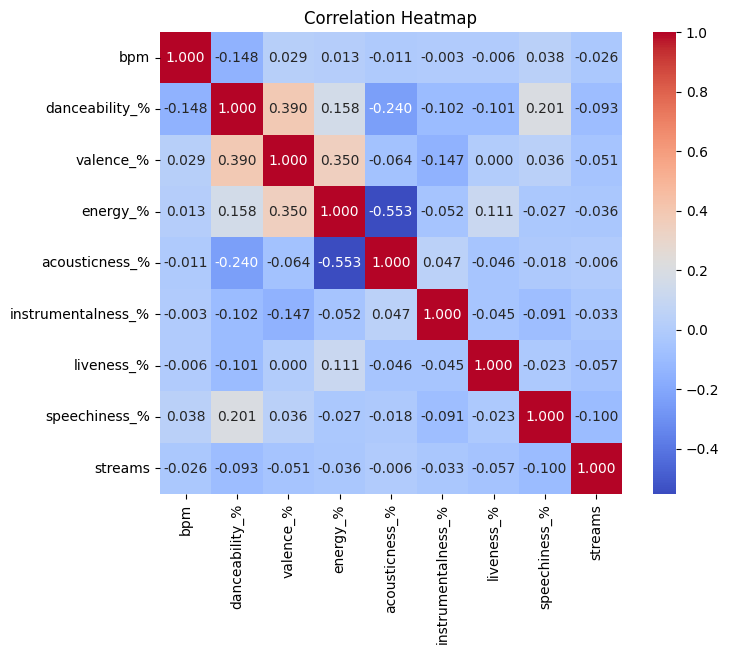

In [ ]:
columns_to_correlate = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']

correlation_matrix = df_da[columns_to_correlate].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", square=True)

plt.title("Correlation Heatmap")
plt.show()

####Explorando a Correlação do BPM com os Atributos Musicais

Este código gera uma matriz de gráficos de dispersão, acompanhados de uma linha de regressão, para visualizar a correlação entre o BPM (batidas por minuto) e diversos atributos musicais ("dançabilidade", "valência", "energia", "acusticidade", "instrumentalidade", "vivacidade", "cantabilidade" e "streams"). Os gráficos exibem a relação entre o BPM e os outros atributos, fornecendo uma visão detalhada de como a variação no BPM se relaciona com a variação em cada atributo musical. A barra lateral de cores em cada gráfico serve apenas como uma facilidade para a visualização, tornando a identificação de valores mais baixos e altos mais intuitiva. O resultado oferece insights sobre padrões e tendências na relação entre BPM e características musicais específicas.

<ipython-input-43-0573ecdce5ef>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')


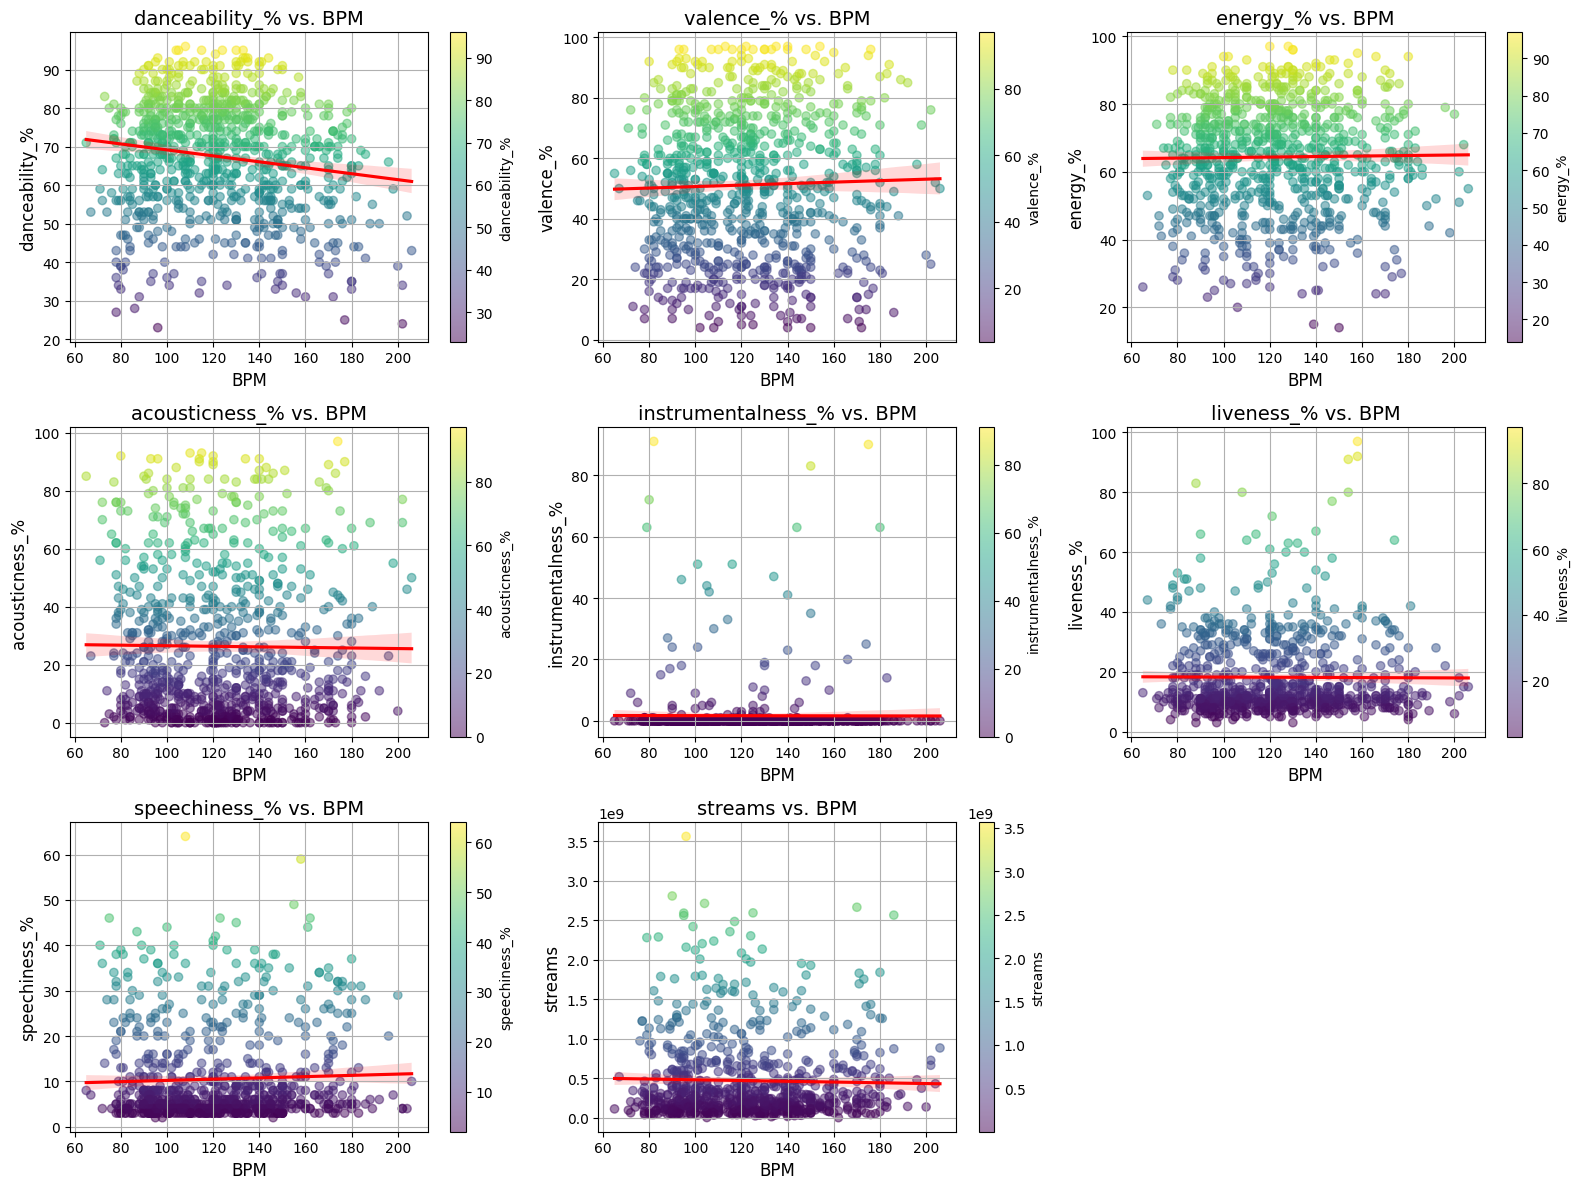

In [ ]:
columns_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']

correlation_df = df_da[['bpm'] + columns_to_plot].corr(method='pearson')

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])

    scatter = plt.scatter(df_da['bpm'], df_da[column], c=df_da[column], cmap=colormap, alpha=0.5)

    sns.regplot(x='bpm', y=column, data=df_da, scatter=False, ax=axes[i], color='red')


    plt.xlabel('BPM', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. BPM', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

####Relação de Streams com os outros atributos da música

Aqui nós geramos 8 gráficos, uma para cada atributo (BPM, "dançabilidade", "valência", "energia", "acusticidade", "instrumentalidade", "vivacidade" e "cantabilidade") e relacionamos eles com o número de streams (popularidade) associados a cada música. Cada gráfico de barras mostra como a variável específica (indicada em cada título) se relaciona com o número de streams.

Ao observar os gráficos podemos identificar padrões de preferência no conjunto de dados. Por exemplo, se existir uma concentração em certos valores para os atributos, isso pode indicar uma preferência geral por um estilo específico de música. Por outro lado, se os gráficos mostrarem uma dispersão dos dados, isso sugere uma diversidade de gostos no conjunto de dados.
Por exemplo, no caso do BPM, caso exista a concentração de ocorrências  podemos interpretar uma preferência por músicas com um ritmo específico. Caso contrário, isso sugere uma variedade de estilos musicais, significando que essa preferência não é tão latente.

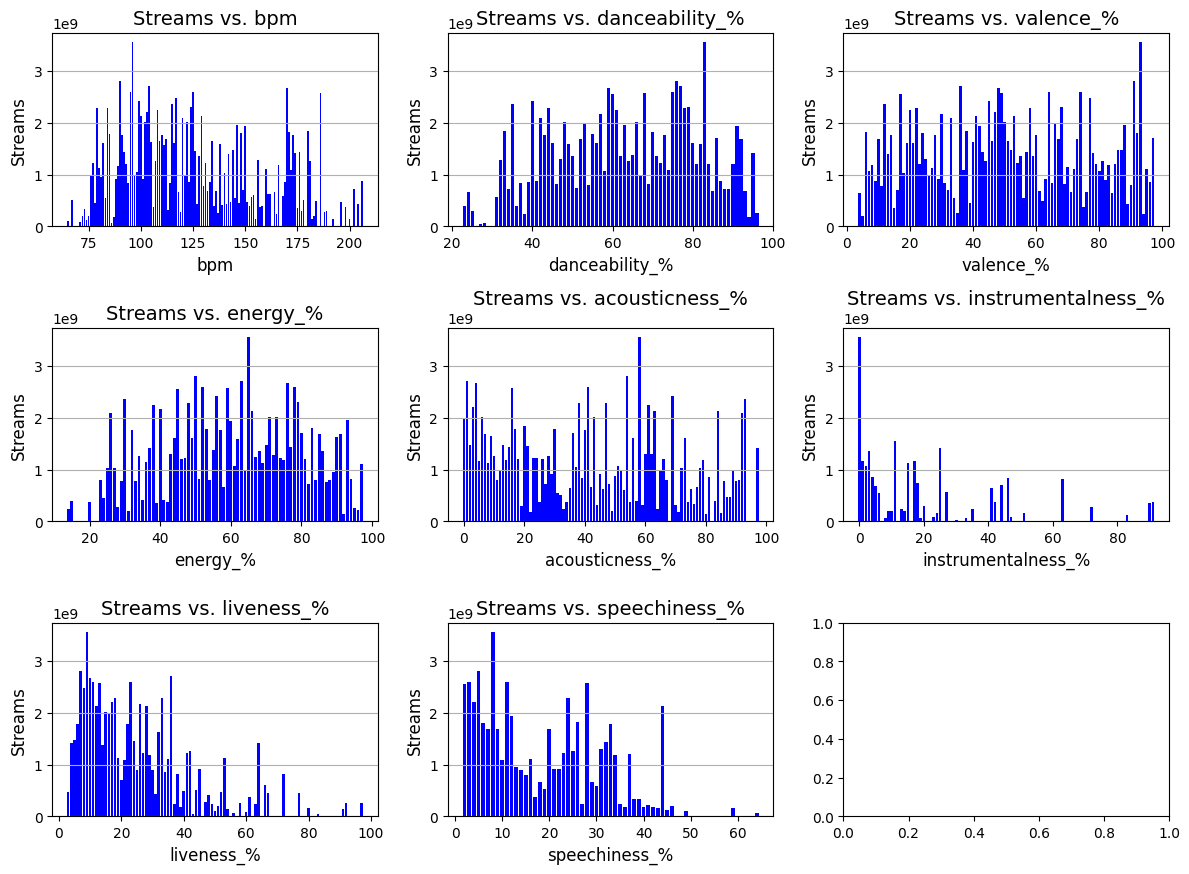

In [ ]:
columns_to_plot = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(12, 9))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(df_da[column], df_da['streams'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

Este código está selecionando diferentes conjuntos de músicas com base no número de streams (reproduções) em ordem decrescente e crescente. Ele separa esses conjuntos em diferentes variáveis, contendo as 10, 50, 100, 200, 500, 700, e 817 músicas mais reproduzidas, bem como as 10, 50, 100, 200, e 500 menos reproduzidas.

In [ ]:
top_10_songs = df_da.nlargest(10, 'streams')
top_50_songs = df_da.nlargest(50, 'streams')
top_100_songs = df_da.nlargest(100, 'streams')
top_200_songs = df_da.nlargest(200, 'streams')
top_500_songs = df_da.nlargest(500, 'streams')
top_700_songs = df_da.nlargest(700, 'streams')
top_817_songs = df_da.nlargest(817, 'streams')
last_10_songs = df_da.nsmallest(10, 'streams')
last_50_songs = df_da.nsmallest(50, 'streams')
last_100_songs = df_da.nsmallest(100, 'streams')
last_200_songs = df_da.nsmallest(200, 'streams')
last_500_songs = df_da.nsmallest(500, 'streams')

Este código cria listas de DataFrames e seus títulos para facilitar o gerenciamento e referência aos conjuntos de músicas criados anteriormente, tanto os mais reproduzidos quanto os menos reproduzidos.

In [ ]:
dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_700_songs, top_817_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 700', 'Top 817']
last_dataframes = [last_10_songs, last_50_songs, last_100_songs, last_200_songs, last_500_songs]
last_labels = ['Last 10', 'Last 50', 'Last 100', 'Last 200', 'Last 500']

####Distribuição do BPM para cada subconjunto

Este código cria um gráfico que demonstra o BPM (batidas por minuto) em diferentes conjuntos de músicas criados anteriormente, que são os conjuntos de 10, 50, 100, 200, 500, 700, e 817 músicas mais reproduzidas. Também mostra as estatísticas de BPM, incluindo o valor máximo, mínimo e médio para cada conjunto. O gráfico utiliza pontos dispersos para mostrar os valores individuais de BPM em cada conjunto, as linhas pontilhadas representam o valor máximo e mínimo, e uma linha sólida para indicar a média de BPM.

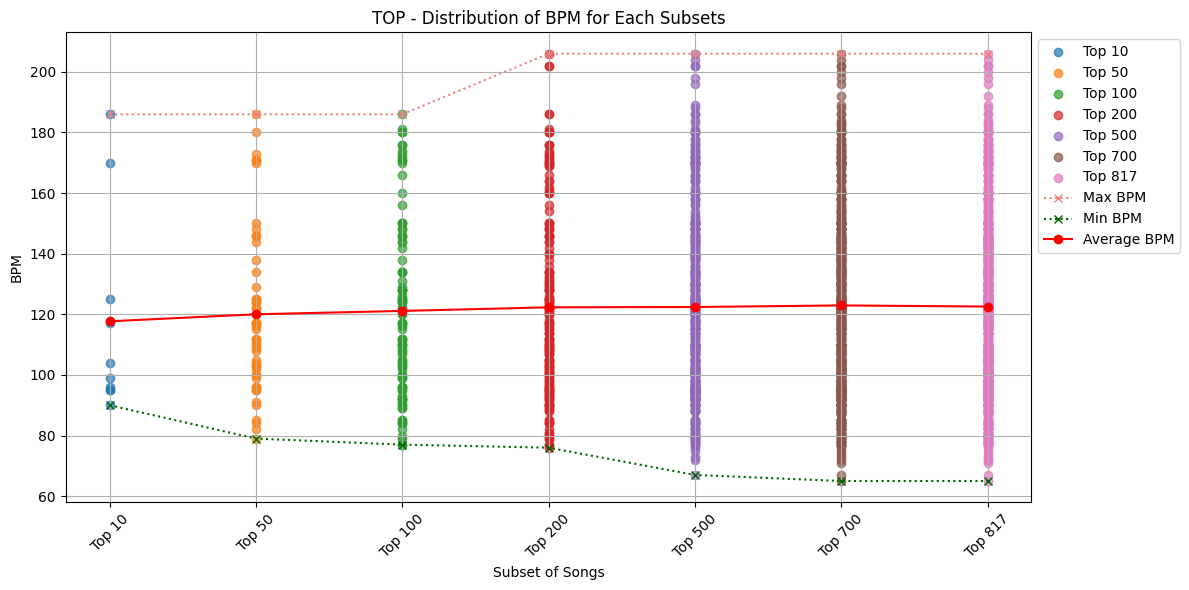

In [ ]:
bpm_min = []
bpm_max = []

for df in dataframes:
    bpm_min.append(df['bpm'].min())
    bpm_max.append(df['bpm'].max())

plt.figure(figsize=(12, 6))
bpm_avg = []


for i, df in enumerate(dataframes):
    plt.scatter([i] * len(df), df['bpm'], label=labels[i], alpha=0.7)
    avg = df['bpm'].mean()
    bpm_avg.append(avg)


# Line for max BPM
plt.plot(labels, bpm_max, marker='x', linestyle='dotted', color='lightcoral', label='Max BPM')

# Line for min BPM
plt.plot(labels, bpm_min, marker='x', linestyle='dotted', color='darkgreen', label='Min BPM')

plt.plot(range(len(dataframes)), bpm_avg, marker='o', linestyle='-', color='red', label='Average BPM')
plt.xlabel('Subset of Songs')
plt.ylabel('BPM')
plt.title('TOP - Distribution of BPM for Each Subsets')
plt.xticks(range(len(dataframes)), labels, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

####Explorando a Frequência e Padrões

Para aprofundar nossa compreensão do conjunto de dados, produzimos histogramas (representação gráfica em colunas para demonstrar a distribuição de frequências),  que destacam a frequência dos atributos "dançabilidade", "valência", "energia", "acusticidade", "instrumentalidade", "vivacidade" e "cantabilidade", em relação ao número de ocorrências. Essa análise visa identificar padrões ou intervalos significativos em cada atributo. Ao examinar visualmente a distribuição, buscamos discernir se há tendências marcantes ou se os resultados são mais aleatórios. Essa abordagem nos permite entender a presença de padrões ou resultados totalmente distintos.

Cada coluna do histograma representa um intervalo de valores de cada atributo, e a altura das barras indica a frequência com que os valores estão presentes no conjunto de dados. O gráfico também inclui uma curva de densidade (kde) que exibe a distribuição do atributo de forma mais suave e simples de ser visualizada.

Começamos pelo histograma que mostra a distribuição da "dançabilidade" (um indicador de quão dançante uma musica é) no conjunto de dados total do dataset.

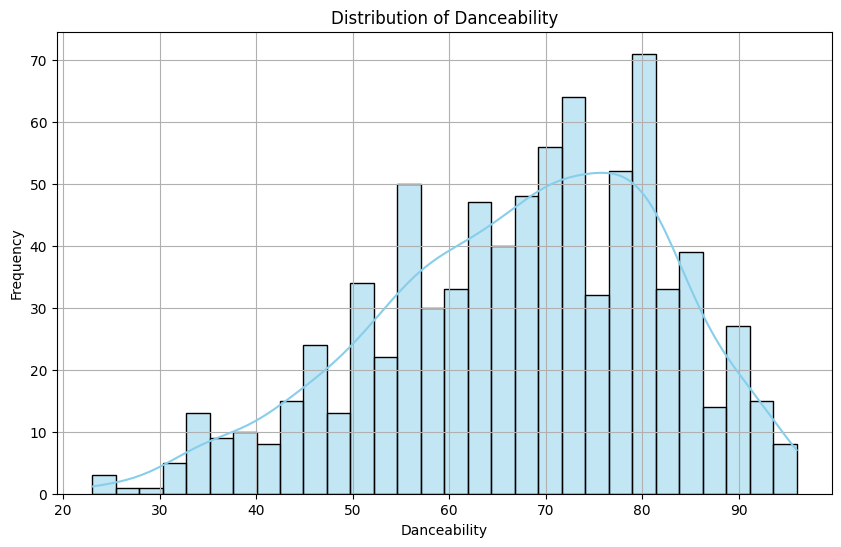

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['danceability_%'], bins=30, kde=True, color='skyblue')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.grid(True)
plt.show()

Agora demonstramos a distribuição da "valência" (uma medida de positividade).

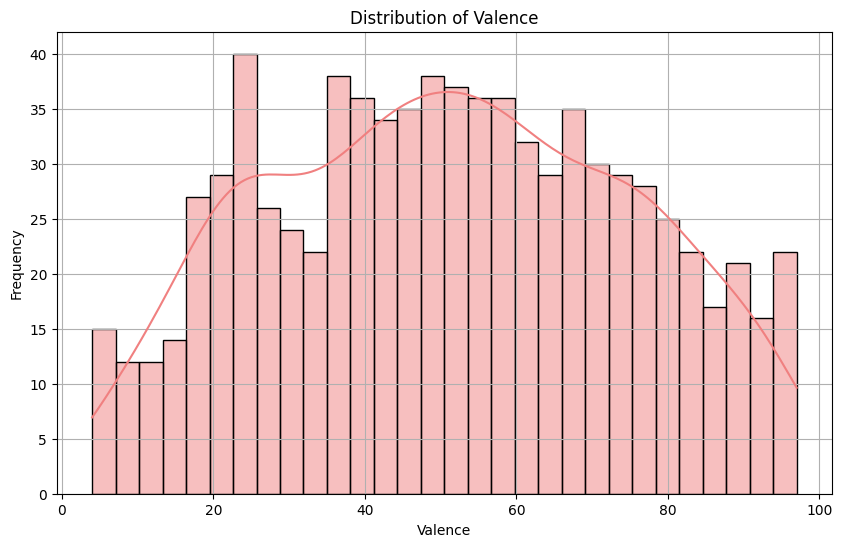

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['valence_%'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.title('Distribution of Valence')
plt.grid(True)
plt.show()

Aqui é criado um histograma que representa a distribuição da "energia"(que demonstra o quanto a música é animada).

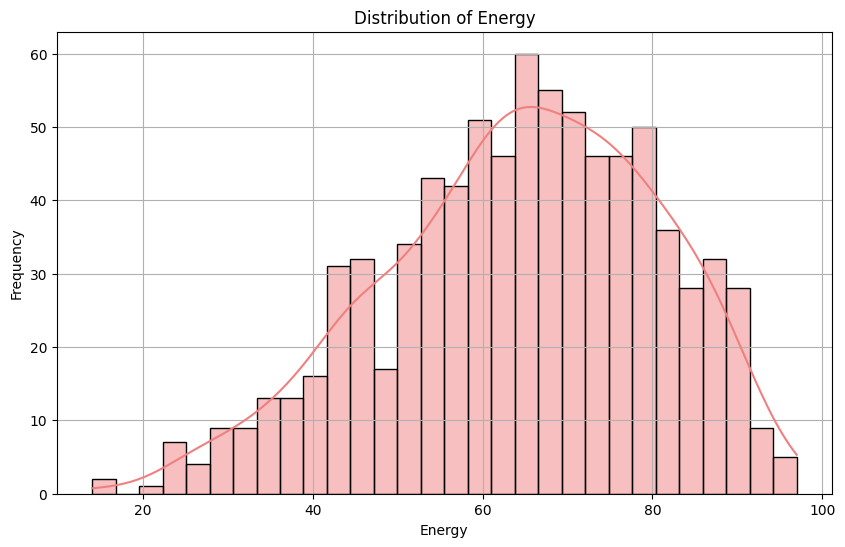

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['energy_%'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy')
plt.grid(True)
plt.show()

Agora demonstramos a distribuição da "acusticidade".

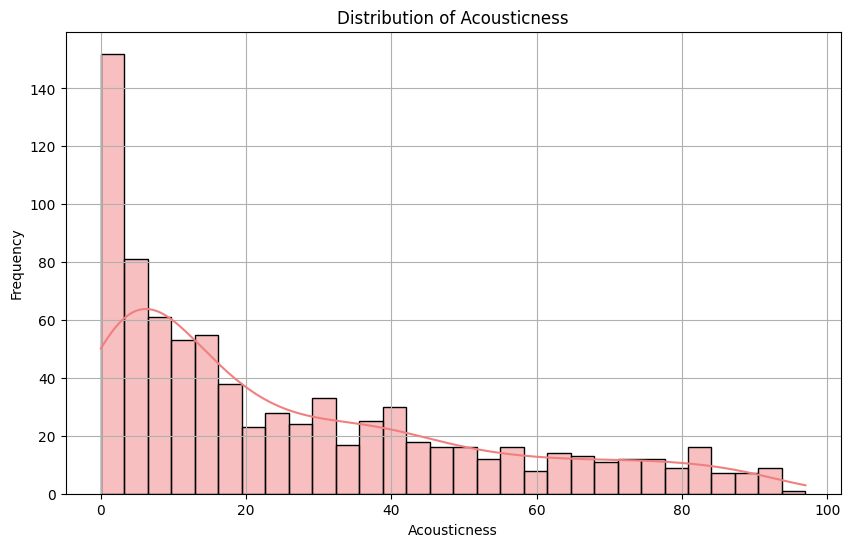

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['acousticness_%'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.title('Distribution of Acousticness')
plt.grid(True)
plt.show()

Aqui é criado um histograma que representa a distribuição da "instrumentalidade".

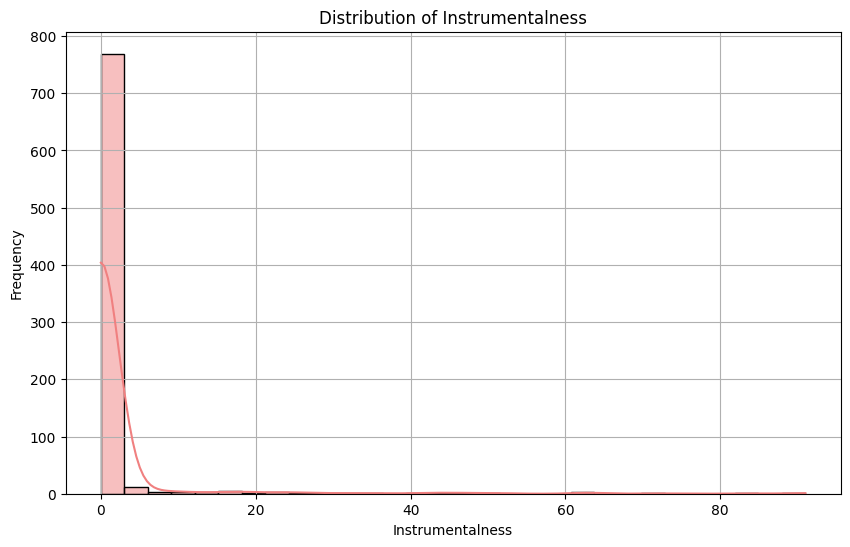

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['instrumentalness_%'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Instrumentalness')
plt.ylabel('Frequency')
plt.title('Distribution of Instrumentalness')
plt.grid(True)
plt.show()

Agora demonstramos a distribuição da vivacidade.

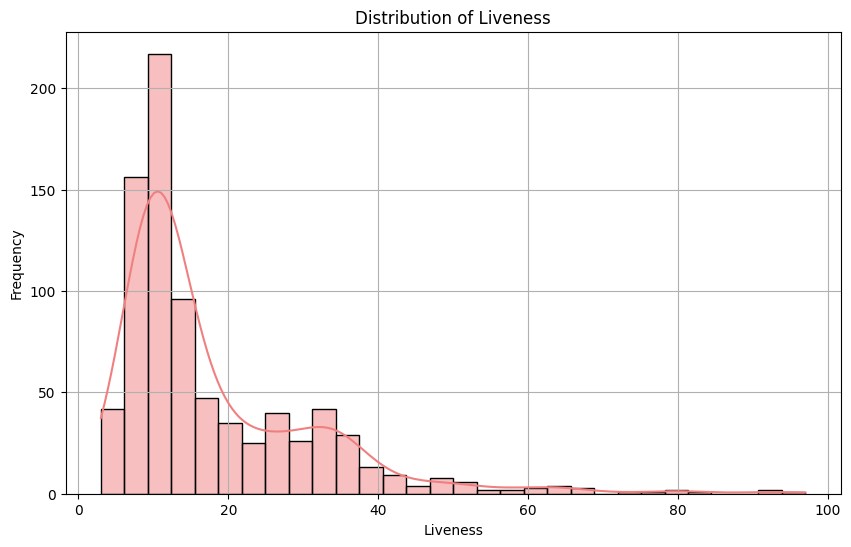

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['liveness_%'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Liveness')
plt.ylabel('Frequency')
plt.title('Distribution of Liveness')
plt.grid(True)
plt.show()

Aqui é criado um histograma que representa a distribuição da "cantabilidade".

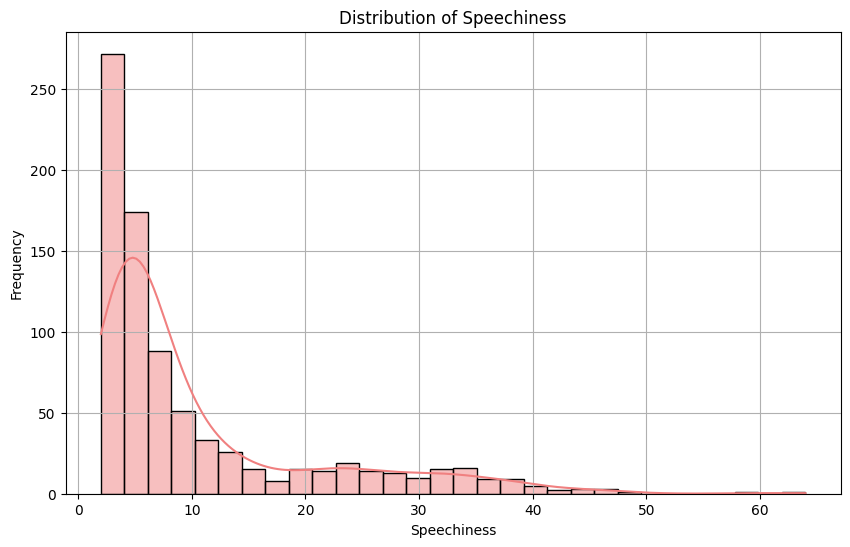

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_da['speechiness_%'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Speechiness')
plt.ylabel('Frequency')
plt.title('Distribution of Speechiness')
plt.grid(True)
plt.show()